<a href="https://colab.research.google.com/github/YasiruMM/Medicine-Prediction-Grp-22/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/My Drive/DSGP/updated_MediTrack_Dataset.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


# Sales Trends Over Time

float64


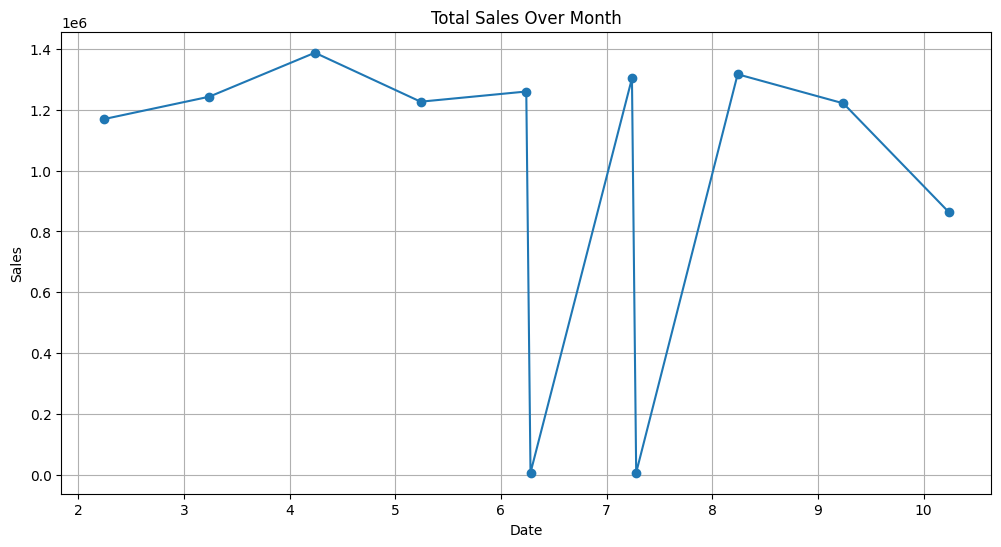

In [ ]:
import matplotlib.pyplot as plt
print(df['Date'].dtype)
# Aggregate sales per month
df_grouped = df.groupby('Date')['Sales'].sum()

# Plot sales trend
plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped.values, marker='o', linestyle='-')
plt.title('Total Sales Over Month')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Sales Trends Over Retail Price

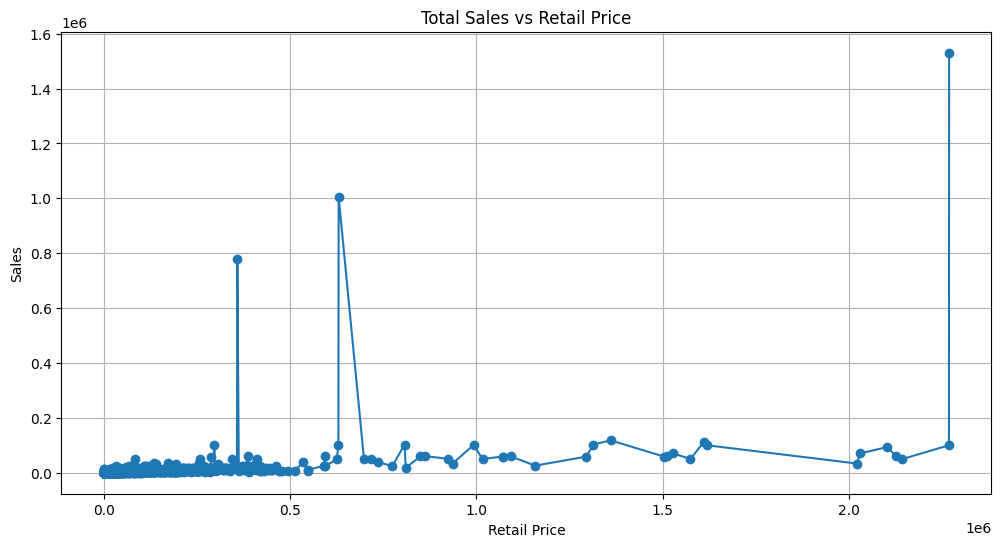

In [ ]:
# Aggregate sales by retail price
df_grouped_price = df.groupby('Retail Price')['Sales'].sum()

# Plot Sales vs Retail Price
plt.figure(figsize=(12, 6))
plt.plot(df_grouped_price.index, df_grouped_price.values, marker='o', linestyle='-')
plt.title('Total Sales vs Retail Price')
plt.xlabel('Retail Price')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Sales Trends over Purchase Price

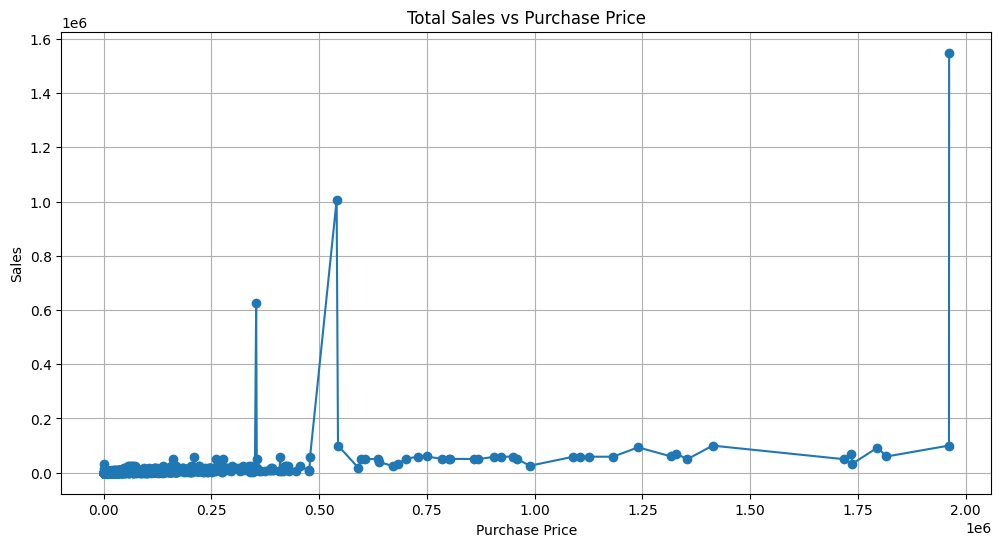

In [ ]:
# Aggregate sales by retail price
df_grouped_price = df.groupby('Purchase Price')['Sales'].sum()

# Plot Sales vs Retail Price
plt.figure(figsize=(12, 6))
plt.plot(df_grouped_price.index, df_grouped_price.values, marker='o', linestyle='-')
plt.title('Total Sales vs Purchase Price')
plt.xlabel('Purchase Price')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Sales Trends over Buffer Stocks

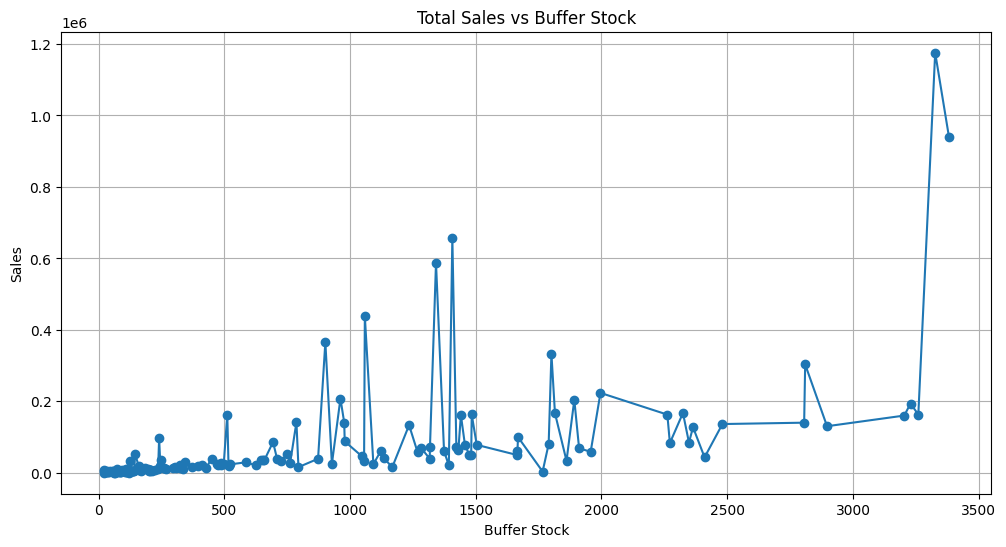

In [ ]:
df_grouped_buffer=df.groupby('Buffer Stock')['Sales'].sum()
plt.figure(figsize=(12,6))
plt.plot(df_grouped_buffer.index,df_grouped_buffer.values,marker='o',linestyle='-')
plt.title('Total Sales vs Buffer Stock')
plt.xlabel('Buffer Stock')
plt.ylabel('Sales')
plt.grid(True)

# Generating Heat Map

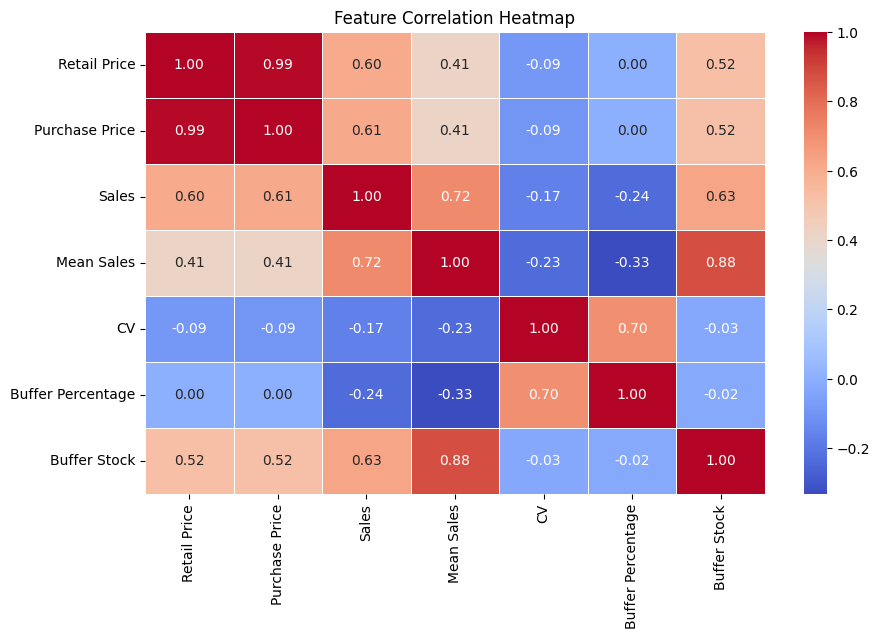

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_features = ['Retail Price', 'Purchase Price', 'Sales', 'Mean Sales', 'CV', 'Buffer Percentage', 'Buffer Stock']
df_numeric = df[numerical_features]  # Create a new dataframe with only numerical columns

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



# Noise Inspection via skewness check

Retail Price         3.155883
Purchase Price       3.232300
Sales                2.424100
Date                -0.010497
Mean Sales           3.054112
CV                   0.056413
Buffer Percentage   -1.687921
Buffer Stock         1.218194
dtype: float64


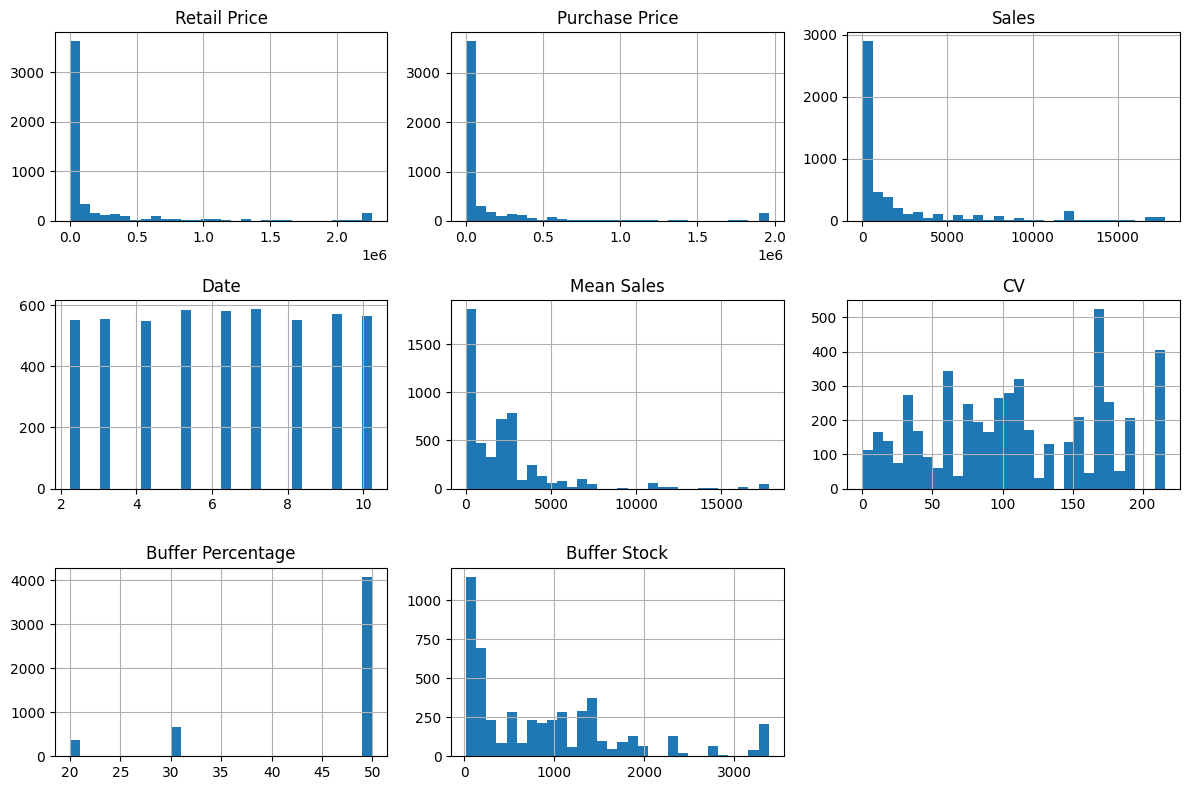

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Check skewness for each feature
skew_values = df[numerical_features].skew()

# Print skewness
print(skew_values)

# Plot histograms to visualize skewness
df[numerical_features].hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()
